# Gaussian Blur, Medical Images

In this notebook we are going to make use of the OpenCV [GaussianBlur](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1) function. We are going to create a bigger `(5,5)` Gaussian kernel in order to enhance the effect of the blur. Then we are going to compare between the effects of edge detection kernel on a normal image and an image with Gaussian blur applied.


### Import resources and display image

In [20]:
# Import the required dependencies
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [5]:
# Read in the image
image: np.ndarray = cv2.imread('images/brain_MR.jpg', flags=cv2.IMREAD_GRAYSCALE)
# Make a copy of the image
image_copy: np.ndarray = np.copy(image)

### Gaussian blur the image

In [4]:
def gaussian_blur(image: np.ndarray, ksize: Tuple[int, int] = (9, 9)) -> np.ndarray:
    blur: np.ndarray = cv2.GaussianBlur(src=image, ksize=ksize, sigmaX=0, sigmaY=0)
    return blur

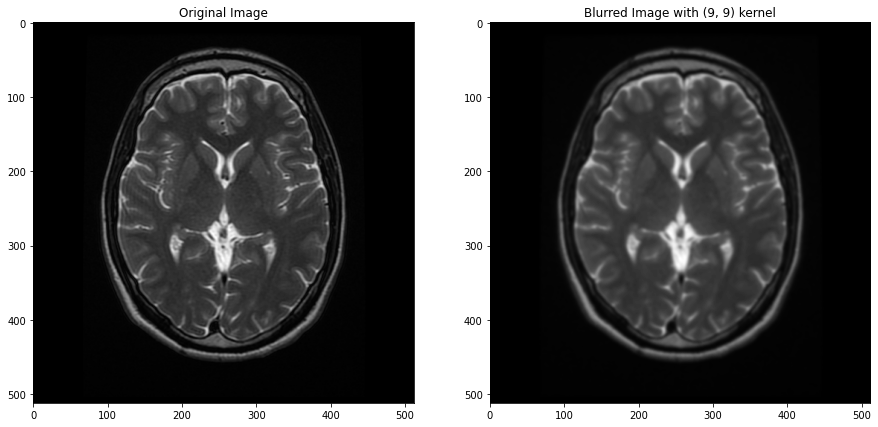

In [21]:
blurred: np.ndarray = gaussian_blur(image=image_copy)
__, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(blurred, cmap='gray')
ax2.set_title('Blurred Image with (9, 9) kernel');

### Edge detection and test performance

In [18]:
# High-pass filter 
def detect_edges(image: np.ndarray, make_binary: bool = False) -> np.ndarray:
    sobel_x: np.ndarray = np.array([[ -1, 0, 1], 
                                    [ -2, 0, 2], 
                                    [ -1, 0, 1]])
    sobel_y: np.ndarray = np.array([[ -1, -2, -1], 
                                    [ 0, 0, 0], 
                                    [ 1, 2, 1]])
    grad_x: np.ndarray = cv2.filter2D(src=image, ddepth=-1, 
                                      kernel=sobel_x)
    grad_y: np.ndarray = cv2.filter2D(src=image, ddepth=-1, 
                                      kernel=sobel_y)
    filtered: np.ndarray = cv2.addWeighted(src1=cv2.convertScaleAbs(grad_x), 
                                           alpha=0.5,  
                                           src2=cv2.convertScaleAbs(grad_y), 
                                           beta=0.5, gamma=0)
    if make_binary:
        _, filtered = cv2.threshold(src=filtered, thresh=20, maxval=255, 
                                 type=cv2.THRESH_BINARY)
    return filtered

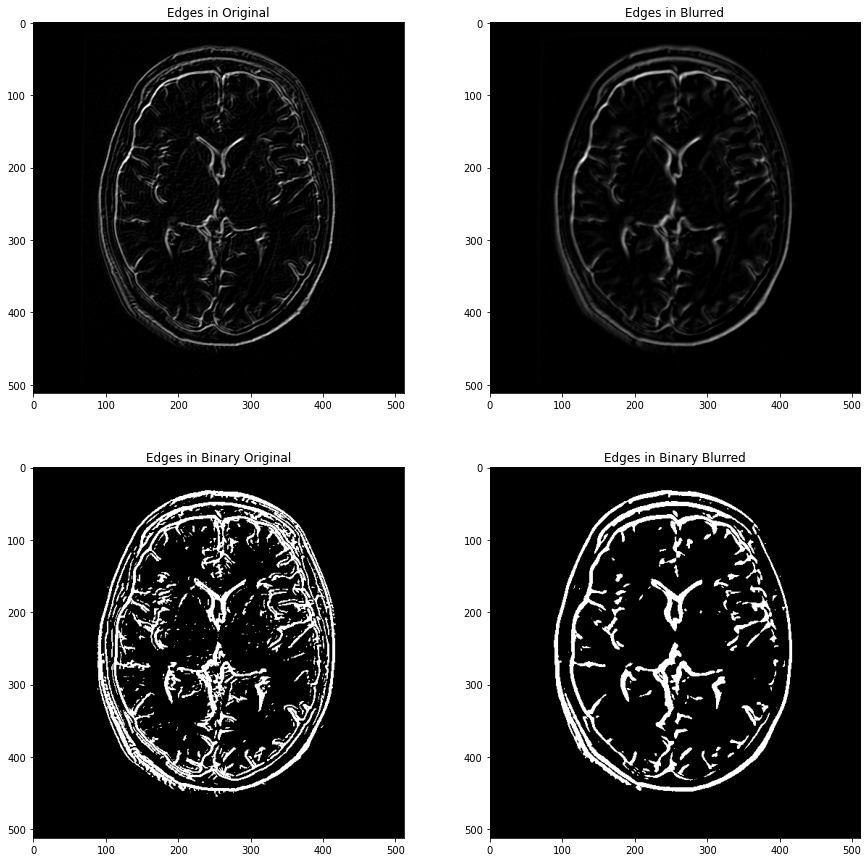

In [19]:
# Detect edges for both original and blurred and compare
edge_orig: np.ndarray = detect_edges(image=image_copy)
edge_blur: np.ndarray = detect_edges(image=blurred)
bin_edge_orig: np.ndarray = detect_edges(image=image_copy, make_binary=True)
bin_edge_blur: np.ndarray = detect_edges(image=blurred, make_binary=True)
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axs[0, 0].imshow(edge_orig, cmap='gray')
axs[0, 0].set_title('Edges in Original')
axs[0, 1].imshow(edge_blur, cmap='gray')
axs[0, 1].set_title('Edges in Blurred')
axs[1, 0].imshow(bin_edge_orig, cmap='gray')
axs[1, 0].set_title('Edges in Binary Original')
axs[1, 1].imshow(bin_edge_blur, cmap='gray')
axs[1, 1].set_title('Edges in Binary Blurred');

We observe, that using the Gaussian blur we could actually get rid of some noise and get clearer edge images.